# 非线性回归

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

/Users/yj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(200, 1)


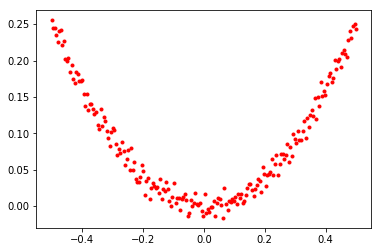

In [17]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
print(x_data.shape)
y_data = np.square(x_data) + np.random.normal(loc=0.0 , scale=0.01,size=200)[:,np.newaxis]
plt.plot(x_data,y_data,'r.')
plt.show()

In [4]:
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
print(x)

Tensor("Placeholder:0", shape=(?, 1), dtype=float32)


In [13]:
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
Biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + Biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

Weights_L2 = tf.Variable(tf.random_normal([10,1]))
Biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + Biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

In [19]:
loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


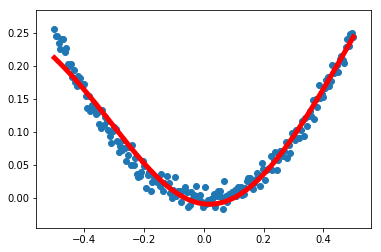

In [21]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    for _ in range(20000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()